In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error



/Users/arwaguudle/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
#uploading the file
heart_attack_df = pd.read_csv("heart_attack_prediction_india.csv")


In [3]:
#clean the data
#checking for missing values
missing_values = heart_attack_df.isnull().sum()
print(missing_values)
#none of them have missing values (yay)

Patient_ID                 0
State_Name                 0
Age                        0
Gender                     0
Diabetes                   0
Hypertension               0
Obesity                    0
Smoking                    0
Alcohol_Consumption        0
Physical_Activity          0
Diet_Score                 0
Cholesterol_Level          0
Triglyceride_Level         0
LDL_Level                  0
HDL_Level                  0
Systolic_BP                0
Diastolic_BP               0
Air_Pollution_Exposure     0
Family_History             0
Stress_Level               0
Healthcare_Access          0
Heart_Attack_History       0
Emergency_Response_Time    0
Annual_Income              0
Health_Insurance           0
Heart_Attack_Risk          0
dtype: int64


In [4]:
heart_attack_df.dropna(inplace=True) #removing any missing values (if theres any...)
heart_attack_df

,Patient_ID,State_Name,Age,Gender,Diabetes,Hypertension,Obesity,Smoking,Alcohol_Consumption,Physical_Activity,...,Diastolic_BP,Air_Pollution_Exposure,Family_History,Stress_Level,Healthcare_Access,Heart_Attack_History,Emergency_Response_Time,Annual_Income,Health_Insurance,Heart_Attack_Risk
0,1,Rajasthan,42,Female,0,0,1,1,0,0,...,119,1,0,4,0,0,157,611025,0,0
1,2,Himachal Pradesh,26,Male,0,0,0,0,1,1,...,115,0,0,7,0,0,331,174527,0,0
2,3,Assam,78,Male,0,0,1,0,0,1,...,117,0,1,10,1,0,186,1760112,1,0
3,4,Odisha,58,Male,1,0,1,0,0,1,...,65,0,0,1,1,1,324,1398213,0,0
4,5,Karnataka,22,Male,0,0,0,0,0,1,...,109,0,0,9,0,0,209,97987,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,Maharashtra,20,Female,0,0,0,1,0,1,...,74,1,1,10,0,0,167,1175023,1,0
9996,9997,Rajasthan,34,Female,0,0,0,0,0,0,...,78,0,1,1,0,0,123,999441,0,1
9997,9998,Gujarat,76,Male,0,0,0,0,0,0,...,98,1,0,1,0,1,376,159536,0,0
9998,9999,Andhra Pradesh,52,Male,0,0,0,0,0,1,...,60,1,0,7,1,0,313,153207,0,0


/Users/arwaguudle/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Count'>

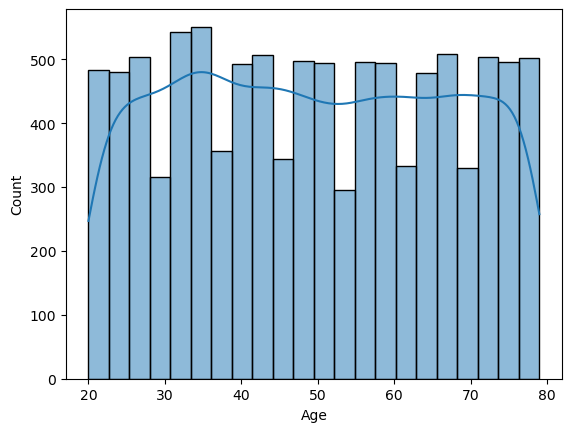

In [5]:
#Explore the data
#check the distribution
sns.histplot(heart_attack_df["Age"],kde=True)

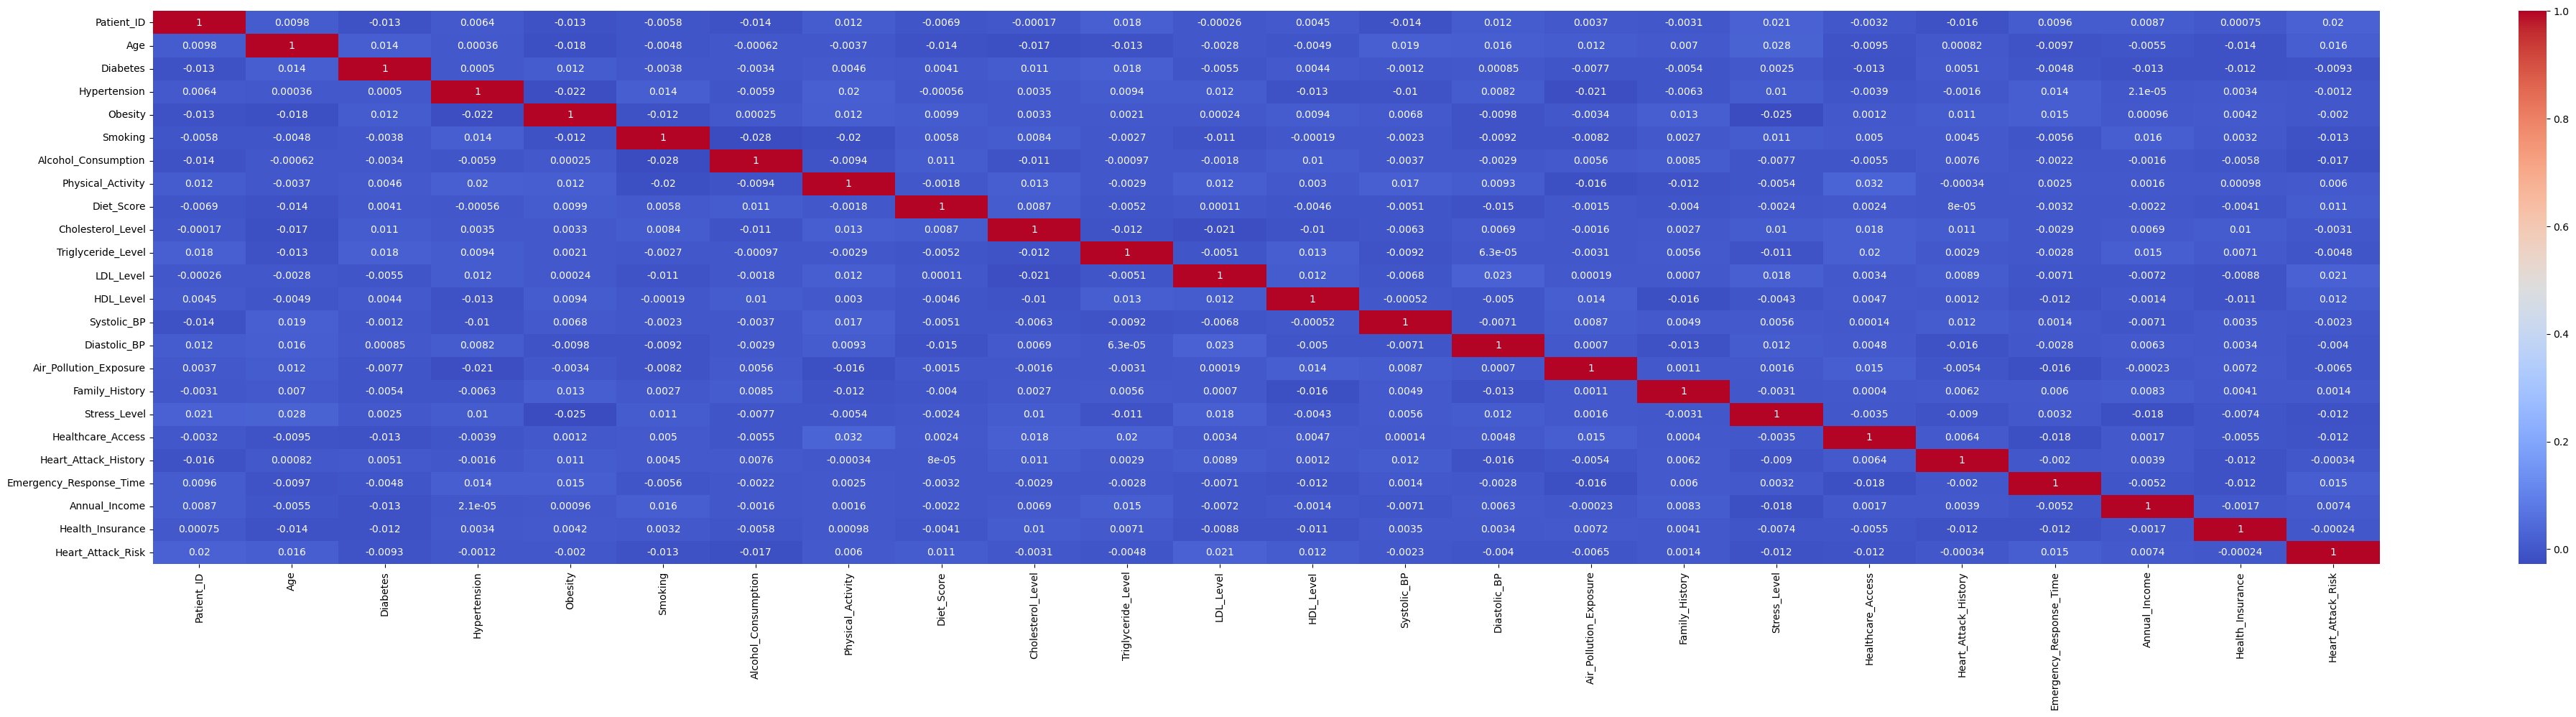

In [6]:
#making the correlation heatmap
plt.figure(figsize=(50,10))
sns.heatmap(heart_attack_df.corr(numeric_only= True),annot=True,cmap="coolwarm")
plt.show()

In [7]:
#training the model
features = ["Age", "Diabetes", "Hypertension", "Obesity", "Smoking", "Alcohol_Consumption", "Cholesterol_Level", "LDL_Level", "HDL_Level", "Systolic_BP", "Diastolic_BP", "Air_Pollution_Exposure", "Family_History", "Stress_Level", "Healthcare_Access"]
X = heart_attack_df[features] #these are the features; the independent columns
y = heart_attack_df["Heart_Attack_Risk"] #these are the target; which are the dependent columns


#splitting them into training/ testing sets
#using the linear regression
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=42)
model = LinearRegression()
model.fit(X_train,y_train)


LinearRegression()

Females: 4484
Males: 5516


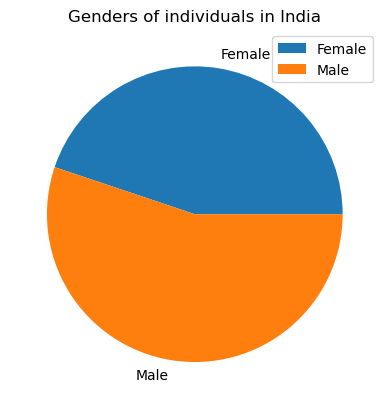

In [60]:
female_count = 0
male_count = 0

for gender in heart_attack_df["Gender"]:
    if gender == "Female":
        female_count += 1
    elif gender == "Male":
        male_count += 1 

print(f"Females: {female_count}")
print(f"Males: {male_count}")

gender_list = [female_count,male_count]
labels = ["Female","Male"]

plt.pie(gender_list,labels=labels)
plt.title("Genders of individuals in India")
plt.legend()

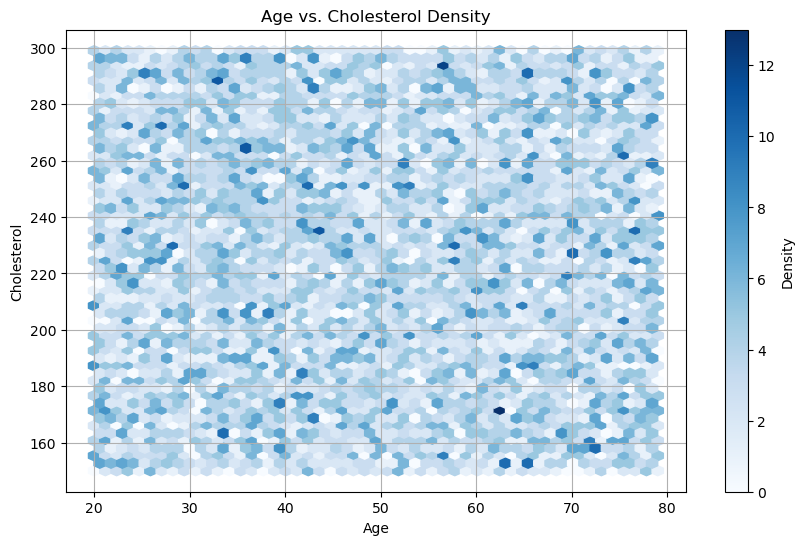

In [15]:
plt.figure(figsize=(10,6))
plt.hexbin(heart_attack_df["Age"], heart_attack_df["Cholesterol_Level"], gridsize=50, cmap="Blues")
plt.colorbar(label="Density")
plt.title('Age vs. Cholesterol Density')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.grid(True)
plt.show()


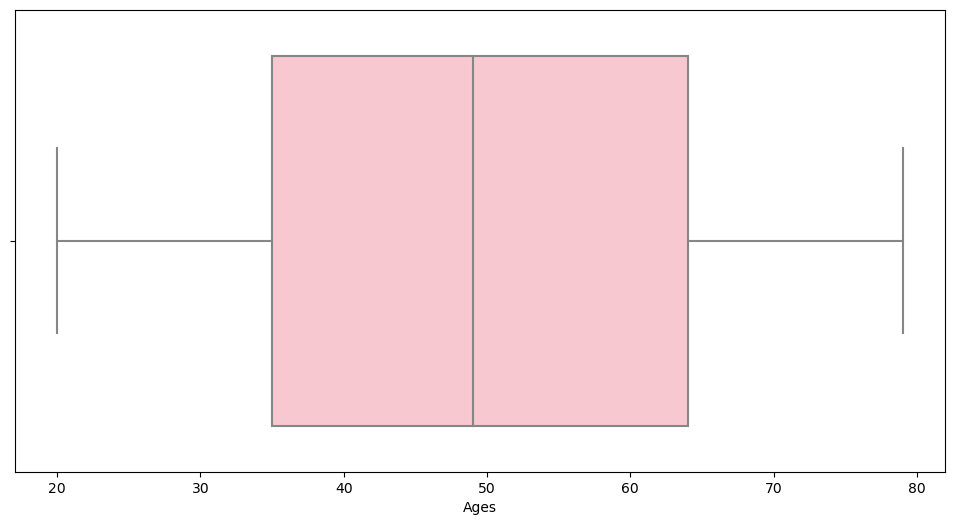

In [40]:
plt.figure(figsize=(12,6))
sns.boxplot(x=heart_attack_df["Age"],color="pink")
plt.xlabel("Ages")
plt.show()
            

/Users/arwaguudle/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


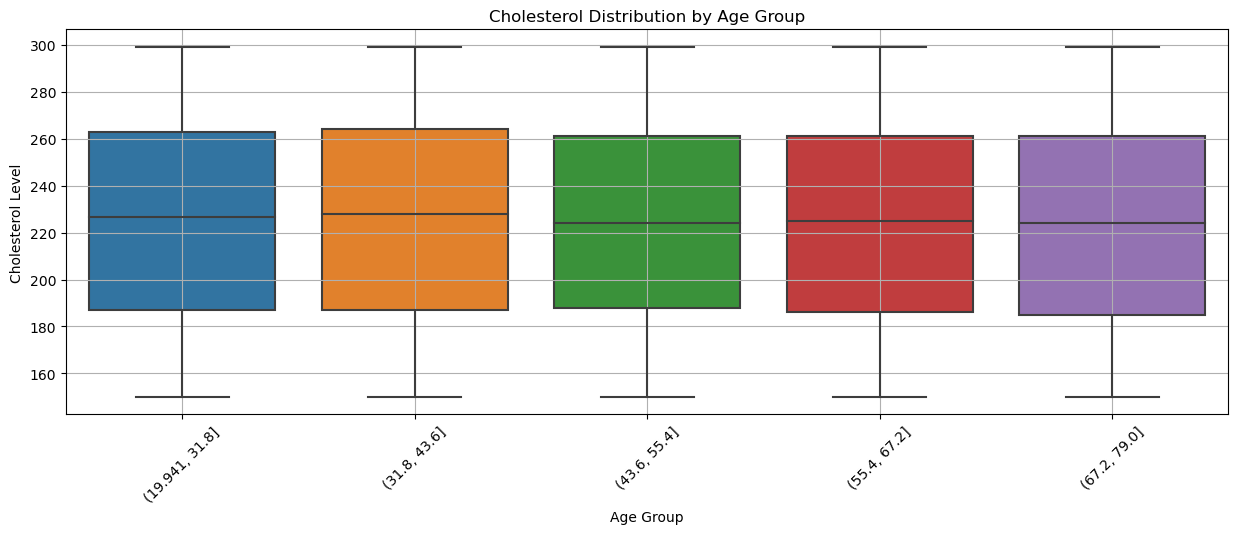

In [25]:
#Making the box plot:
plt.figure(figsize=(15,5))
sns.boxplot(x=pd.cut(heart_attack_df["Age"], bins=5), y=heart_attack_df["Cholesterol_Level"])
plt.xticks(rotation=45)
plt.title('Cholesterol Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Cholesterol Level')
plt.grid(True)
plt.show()


In [ ]:
#Evaluate the modwl; by making predictions
y_pred = model.predict(X_test)

#solving for the Mean Squared Error (MSE)
mse = mean_squared_error(y_test,y_pred)
print("Mean Squared Error: ",mse)





Mean Squared Error:  0.21124868343739112
